In [27]:
# to get web contents
import requests 
# scrap and clean web contents
from bs4 import BeautifulSoup

# numerical opeations
import numpy as np
# storing and processing in a dataframe
import pandas as pd
from time import sleep

import matplotlib.pyplot as plt
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.special import gammaln
from scipy.special import psi
from scipy.optimize import fmin_l_bfgs_b as optim
import statsmodels.formula.api as smf
from scipy.stats import nbinom
import statsmodels.api as sm

from scipy.stats import poisson

from scipy.optimize import curve_fit
from scipy.stats import geom


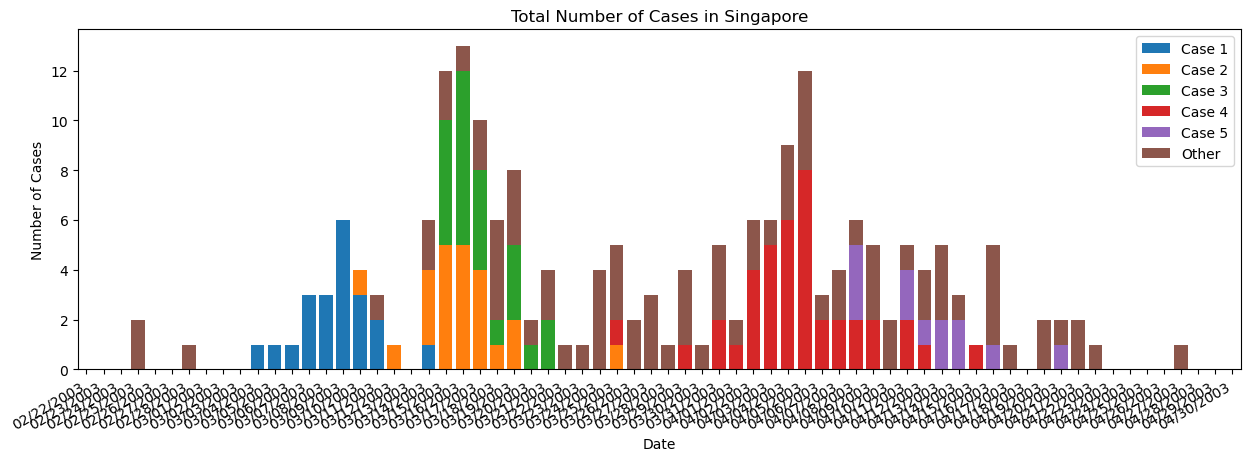

In [33]:
sars_2003 = pd.read_csv("singaporetotalcases.csv")

sars_2003["Total"] = sars_2003["Case 1"] + sars_2003["Case 2"] + sars_2003["Case 3"] + sars_2003["Case 4"] + sars_2003["Case 5"] + sars_2003["Other"]    
sars_2003.head(4)

dates = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in sars_2003["Date"]]
sars_2003["Date"] = dates
plt.figure(figsize=(15,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.bar(sars_2003["Date"], sars_2003["Case 1"], label="Case 1")
plt.bar(sars_2003["Date"], sars_2003["Case 2"], bottom=sars_2003["Case 1"], label="Case 2")
plt.bar(sars_2003["Date"], sars_2003["Case 3"], bottom=sars_2003["Case 1"]+sars_2003["Case 2"], label="Case 3")
plt.bar(sars_2003["Date"], sars_2003["Case 4"], bottom=sars_2003["Case 1"]+sars_2003["Case 2"]+sars_2003["Case 3"], label="Case 4")
plt.bar(sars_2003["Date"], sars_2003["Case 5"], bottom=sars_2003["Case 1"]+sars_2003["Case 2"]+sars_2003["Case 3"]+sars_2003["Case 4"], label="Case 5")
plt.bar(sars_2003["Date"], sars_2003["Other"], bottom=sars_2003["Case 1"]+sars_2003["Case 2"]+sars_2003["Case 3"]+sars_2003["Case 4"]+sars_2003["Case 5"], label="Other")
plt.gcf().autofmt_xdate()
plt.legend()
plt.title("Total Number of Cases in Singapore")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

In [18]:
first_three_gens = sars_2003.iloc[:57]

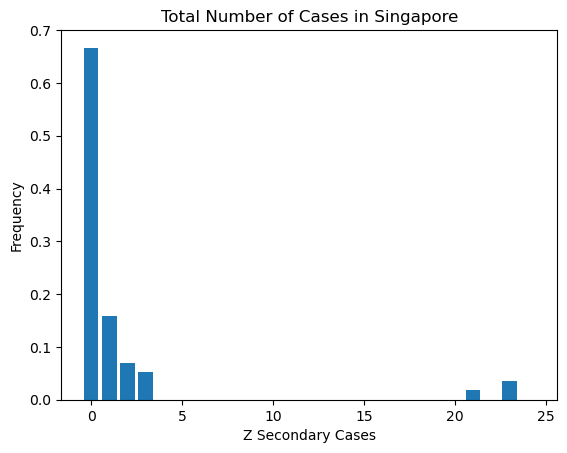

In [19]:
secondary_data = pd.read_csv("singaporethreegenztotal.csv")
secondary_data = secondary_data.iloc[:25]
secondary_data["Proportion"] = secondary_data["Frequency"] / sum(secondary_data["Frequency"])
plt.bar(secondary_data["Z"], secondary_data["Proportion"])
plt.title("Frequency of Secondary Cases in Singapore")
plt.xlabel("Z Secondary Cases")
plt.ylabel("Frequency")
plt.show()

In [20]:
values = []
for i in range(len(secondary_data)):
    if (secondary_data.iloc[i]["Frequency"] != 0):
        values.append(secondary_data.iloc[i]["Frequency"])

R0_estimate = np.sum(secondary_data["Z"] * secondary_data["Frequency"]) / np.sum(secondary_data["Frequency"])
print(R0_estimate)

values = []

for i in range(len(secondary_data)):
    for j in range(int(secondary_data.iloc[i]["Frequency"])):
        values.append(secondary_data.iloc[i]["Z"])
print(np.mean(values))
print(np.var(values))

X = np.ones_like(values)
res = sm.NegativeBinomial(values,X).fit(start_params=[1,1])
mu = np.exp(res.params[0])
p = 1/(1+np.exp(res.params[0])*res.params[1])
k = np.exp(res.params[0])*p/(1-p)
print("N:", len(values))
print("k:", k)
print("R0:", R0_estimate)
print("var(Z)/mean(Z)", np.var(values) / np.mean(values))

num_zeros = 0

for i in range(len(values)):
    if values[i] == 0:
        num_zeros += 1
        
print("Number of zeros:", num_zeros)

1.631578947368421
1.631578947368421
24.548476454293624
Optimization terminated successfully.
         Current function value: 1.367767
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
N: 57
k: 0.15719512788250098
R0: 1.631578947368421
var(Z)/mean(Z) 15.045840407470285
Number of zeros: 38


In [21]:
poisson_values = poisson.pmf(secondary_data["Z"], R0_estimate)

In [22]:

p = 1 / (1+R0_estimate)
geometric_values = geom.pmf(secondary_data["Z"], p)

[8.58902820e-01 8.37095100e-02 3.00291535e-02 1.33876070e-02
 6.55142958e-03 3.37721082e-03 1.79974997e-03 9.81496469e-04
 5.44419035e-04 3.05930892e-04 1.73691070e-04 9.94375215e-05
 5.73212646e-05 3.32351381e-05 1.93653102e-05 1.13318836e-05
 6.65568338e-06 3.92194403e-06 2.31775148e-06 1.37326299e-06
 8.15543879e-07 4.85344181e-07 2.89385607e-07 1.72844500e-07
 1.03400340e-07]


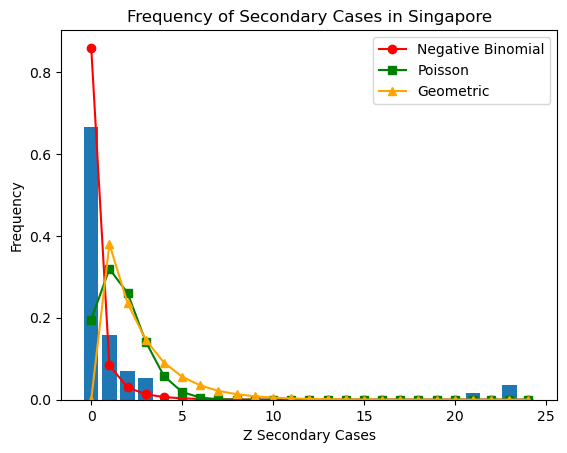

In [26]:
nbin_values = nbinom.pmf(secondary_data["Z"], k, p)
print(nbin_values)
plt.figure(1)
plt.cla()
plt.bar(secondary_data["Z"], secondary_data["Proportion"])
plt.plot(secondary_data["Z"], nbin_values, marker="o", color="red", label="Negative Binomial")
plt.plot(secondary_data["Z"], poisson_values, marker="s", color="green", label="Poisson")
plt.plot(secondary_data["Z"], geometric_values, marker="^", color="orange", label="Geometric")
plt.title("Frequency of Secondary Cases in Singapore")
plt.legend()
plt.xlabel("Z Secondary Cases")
plt.ylabel("Frequency")
plt.show()



In [24]:
reproductive_nums = []

for i in range(11):
    reproductive_nums.append(i)
    
print(reproductive_nums)
p_values = []
for i in range(len(reproductive_nums)):
    p_values.append(1 / (1+reproductive_nums[i]))

nbin_values = nbinom.pmf(0, k, p_values)
print(nbin_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.         0.89676686 0.84139294 0.8041908  0.77647114 0.75453331
 0.7364694  0.72117166 0.70794208 0.69631359 0.68595898]
